<a href="https://colab.research.google.com/github/GavinButts/Fall-Data-Challenge-2022/blob/main/Code/Kevin/Geoplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import sys
!pip install geoplot
!pip install geopandas
!pip uninstall shapely
!pip install shapely --no-binary shapely #y ENTER y at (y/n)?


#import CSV data of PFI
import io
import pandas as pd
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import matplotlib.pyplot as plt


sheet_id = "11rno0SjsOyV1JlevH3q40UMm1s5e6m7g"
sheet_name = "curated_2019-required"

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 10.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 31.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 32.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 30.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 30.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 46.7 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████

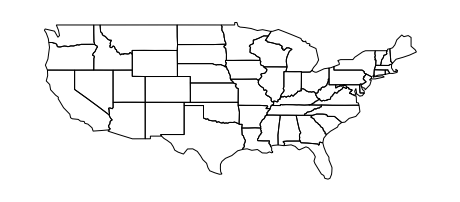

In [2]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

In [3]:
df

,BASMID,ALLGRADEX,EDCPUB,SCCHOICE,SPUBCHOIX,SCONSIDR,SCHLHRSWK,EINTNET,MOSTIMPT,INTNUM,...,SEFUTUREX,DSBLTY,HHPARN19X,HHPARN19_BRD,NUMSIBSX,PARGRADEX,RACEETH,INTACC,CENREG,ZIPLOCL
0,20191000012,12,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,3,4,1,4,11
1,20191000029,4,1,2,3,2,4,3,-1,2,...,6,2,2,2,1,3,3,1,4,12
2,20191000059,11,2,2,2,1,4,3,2,2,...,5,2,2,2,1,5,2,3,2,11
3,20191000070,6,1,1,1,1,4,4,-1,-1,...,6,2,2,2,1,2,3,1,2,31
4,20191000078,9,1,2,3,2,4,4,-1,-1,...,6,2,1,1,1,5,5,1,2,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,20191225472,7,1,2,2,2,4,4,-1,-1,...,5,2,1,1,2,4,4,1,3,23
15496,20191225475,2,1,2,2,2,4,4,-1,-1,...,6,2,1,1,3,5,2,1,2,22
15497,20191225477,12,1,1,3,2,4,4,-1,-1,...,6,2,1,1,2,2,3,1,1,13
15498,20191225479,13,1,2,2,1,4,4,-1,-1,...,6,1,2,2,0,4,1,3,4,11


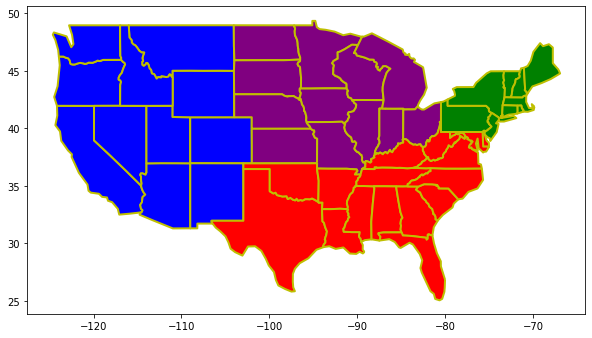

In [5]:
#Plot of Census Regions
west = ['California','Oregon','Washington','Nevada','Arizona','Utah','Colorado','New Mexico','Wyoming','Montana','Idaho']
midwest = ['North Dakota', 'South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri','Wisconsin','Illinois','Indiana','Michigan','Ohio']
south = ['Texas','Oklahoma','Arkansas','Louisiana','Mississippi','Tennessee','Kentucky','Alabama','Georgia','Florida','South Carolina','North Carolina',
         'Delaware','Virginia','West Virginia','Maryland'] #needs DC?
northeast = ['Pennsylvania','New York','Vermont','New Hampshire','Maine','Massachusetts','Connecticut','Rhode Island','New Jersey']
fig, ax = plt.subplots(figsize =(10,10))
for n in west:
  contiguous_usa[contiguous_usa.state == f'{n}'].plot(color = 'blue', ax=ax, edgecolor='y',linewidth=2)
for n in midwest:
  contiguous_usa[contiguous_usa.state == f'{n}'].plot(color = 'purple', ax=ax, edgecolor='y',linewidth=2)
for n in south:
  contiguous_usa[contiguous_usa.state == f'{n}'].plot(color = 'red', ax=ax, edgecolor='y',linewidth=2)
for n in northeast:
  contiguous_usa[contiguous_usa.state == f'{n}'].plot(color = 'green', ax=ax, edgecolor='y',linewidth=2)


In [6]:
#Access CENREG column
cenreg = df.loc[:,"CENREG"]
print("CENREG descrptives")
print("Mean = " + str(cenreg.mean()))

cenreg_dict = dict(cenreg.value_counts())
total = sum(cenreg_dict[i] for i in range(1,5))
print(total)
print(cenreg_dict)
cenreg_percent = {}
for n in cenreg_dict:
  cenreg_percent[n] = 100 * cenreg_dict[n]/total
print(cenreg_percent)


CENREG descrptives
Mean = 2.531290322580645
15500
{2: 5639, 4: 3680, 3: 3528, 1: 2653}
{2: 36.380645161290325, 4: 23.741935483870968, 3: 22.761290322580646, 1: 17.116129032258065}


In [7]:
#add cenreg_percent column to each child in df - unnecessary?
df['cenreg_percent'] = 0
for s in df.index:
  #print(s)
  df.loc[s,'cenreg_percent'] = cenreg_percent[df.loc[s, 'CENREG']]

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


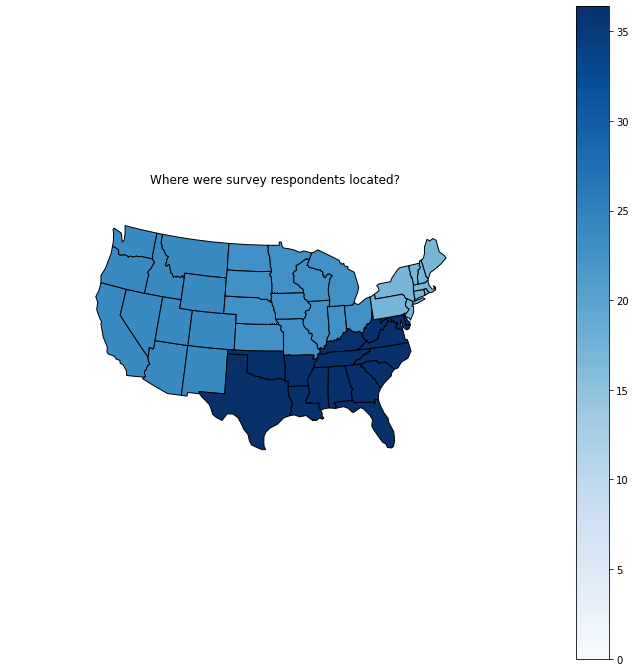

In [8]:
contiguous_usa['cenreg_percent'] = 0
for s in contiguous_usa.index:
  if contiguous_usa.loc[s,'state'] in west: #code 4
    contiguous_usa.loc[s,'cenreg_percent'] = cenreg_percent[4]
  elif contiguous_usa.loc[s,'state'] in midwest: # code 3
      contiguous_usa.loc[s,'cenreg_percent'] = cenreg_percent[3]
  elif contiguous_usa.loc[s,'state'] in south: #code 2
      contiguous_usa.loc[s,'cenreg_percent'] = cenreg_percent[2]
  elif contiguous_usa.loc[s,'state'] in northeast: #code 1
      contiguous_usa.loc[s,'cenreg_percent'] = cenreg_percent[1]
contiguous_usa
fig = gplt.choropleth(contiguous_usa, hue='cenreg_percent', projection=gcrs.AlbersEqualArea(), cmap='Blues', legend=True, 
                edgecolor='Black', figsize=(12, 12))
plt.title("Where were survey respondents located?")
fig.savefig('temp.png', transparent=True)


CENREG            1         2         3         4
SPUBCHOIX                                        
-1         0.000377  0.000177  0.000000  0.000000
 1         0.223144  0.323107  0.400227  0.467391
 2         0.510366  0.416563  0.344671  0.261413
 3         0.266114  0.260153  0.255102  0.271196


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


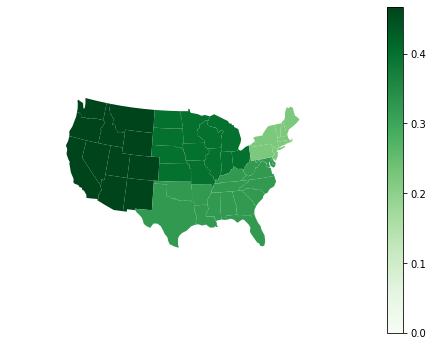

In [9]:
#Cross-tab of school-choice vs. census region 
#1 - yes 
#2 - no
#3 don't no
#print(pd.crosstab(df_url.SPUBCHOIX, df_url.CENREG))
#print(pd.crosstab(df_url.SPUBCHOIX, df_url.CENREG,normalize='columns'))
#pd.crosstab(df_url.SPUBCHOIX, df_url.CENREG,normalize='columns').plot.bar(stacked=True)

#spubchoix = [-1,1,2,3]
#cenreg = [1,2,3,4]

#add a column for percent in region that responded yes to school-choice

contiguous_usa['spubchoix_yes_percent'] = 0

ct = pd.crosstab(df.SPUBCHOIX, df.CENREG,normalize='columns')
print(ct)
#let's go by percent that respond "yes"

for s in contiguous_usa.index:
  if contiguous_usa.loc[s,'state'] in west: #code 4
    contiguous_usa.loc[s,'spubchoix_yes_percent'] = ct[4][1]
  elif contiguous_usa.loc[s,'state'] in midwest: # code 3
      contiguous_usa.loc[s,'spubchoix_yes_percent'] = ct[3][1]
  elif contiguous_usa.loc[s,'state'] in south: #code 2
      contiguous_usa.loc[s,'spubchoix_yes_percent'] = ct[2][1]
  elif contiguous_usa.loc[s,'state'] in northeast: #code 1
      contiguous_usa.loc[s,'spubchoix_yes_percent'] = ct[1][1]

gplt.choropleth(contiguous_usa, hue='spubchoix_yes_percent', projection=gcrs.AlbersEqualArea(), cmap='Greens', legend=True)

#print(pd.crosstab(df_url.SPUBCHOIX, df_url.CENREG,normalize='columns')[1][-1])
#print("cenreg_dict: " + str(cenreg_dict))
#region 1
#print(cenreg_dict[1])

CENREG     1     2     3     4
EDCPUB                        
1       2356  4995  3118  3313
2        297   644   410   367
CENREG         1         2         3         4
EDCPUB                                        
1       0.888051  0.885795  0.883787  0.900272
2       0.111949  0.114205  0.116213  0.099728


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


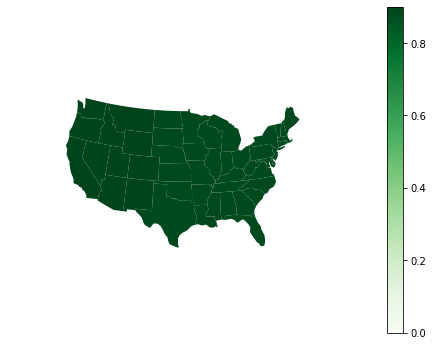

In [10]:
#now let's do a map for regional differences between public and private
#using variable EDCPUB
2#1 is yes (attends publi school), 2 is no (does not attend public school)

contiguous_usa['edcpub_yes_percent'] = 0

print(pd.crosstab(df.EDCPUB, df.CENREG))

ct = pd.crosstab(df.EDCPUB, df.CENREG,normalize='columns')
print(ct)

#let's go by percent that respond "yes"

for s in contiguous_usa.index:
  if contiguous_usa.loc[s,'state'] in west: #code 4
    contiguous_usa.loc[s,'edcpub_yes_percent'] = ct[4][1]
  elif contiguous_usa.loc[s,'state'] in midwest: # code 3
      contiguous_usa.loc[s,'edcpub_yes_percent'] = ct[3][1]
  elif contiguous_usa.loc[s,'state'] in south: #code 2
      contiguous_usa.loc[s,'edcpub_yes_percent'] = ct[2][1]
  elif contiguous_usa.loc[s,'state'] in northeast: #code 1
      contiguous_usa.loc[s,'edcpub_yes_percent'] = ct[1][1]

gplt.choropleth(contiguous_usa, hue='edcpub_yes_percent', projection=gcrs.AlbersEqualArea(), cmap='Greens', legend=True)


CENREG       1     2     3     4
FSSPORTX                        
-1          19    64    16    27
 1        2066  4423  2929  2843
 2         568  1152   583   810
CENREG           1         2         3         4
FSSPORTX                                        
-1        0.007162  0.011350  0.004535  0.007337
 1        0.778741  0.784359  0.830215  0.772554
 2        0.214097  0.204292  0.165249  0.220109


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


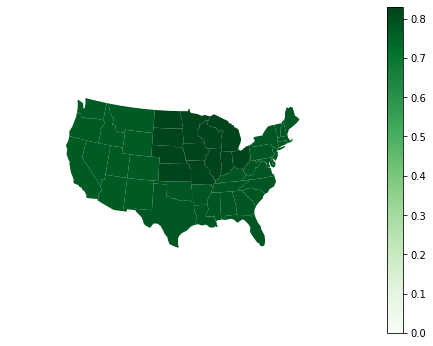

In [11]:
#now let's do regional differences for parental involvement FSSPORTX
# Since the beginning of this school year, has any adult in this child’s household Attended a school or class event,
# such as a play, dance, sports event, or science fair
#1 is yes, 2 is no

contiguous_usa['fssportx_yes_percent'] = 0

print(pd.crosstab(df.FSSPORTX, df.CENREG))

ct = pd.crosstab(df.FSSPORTX, df.CENREG,normalize='columns')
print(ct)

#let's go by percent that respond "yes"

for s in contiguous_usa.index:
  if contiguous_usa.loc[s,'state'] in west: #code 4
    contiguous_usa.loc[s,'fssportx_yes_percent'] = ct[4][1]
  elif contiguous_usa.loc[s,'state'] in midwest: # code 3
      contiguous_usa.loc[s,'fssportx_yes_percent'] = ct[3][1]
  elif contiguous_usa.loc[s,'state'] in south: #code 2
      contiguous_usa.loc[s,'fssportx_yes_percent'] = ct[2][1]
  elif contiguous_usa.loc[s,'state'] in northeast: #code 1
      contiguous_usa.loc[s,'fssportx_yes_percent'] = ct[1][1]

gplt.choropleth(contiguous_usa, hue='fssportx_yes_percent', projection=gcrs.AlbersEqualArea(), cmap='Greens', legend=True)


In [17]:
#create FOYESCNT variable that determines the amount of times each person said 'Yes' on the FO#### questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

FOYESCNT = []      #variable that will be added to csv
yesCount = 0
FOYESCNT_LMH = []
for i in range(15500):
  if df['FOSTORY2X'][i] == 1:
    yesCount += 1
  if df['FOCRAFTS'][i] == 1:
    yesCount += 1
  if df['FOGAMES'][i] == 1:
    yesCount += 1
  if df['FOBUILDX'][i] == 1:
    yesCount += 1
  if df['FOSPORT'][i] == 1:
    yesCount += 1
  if df['FORESPON'][i] == 1:
    yesCount += 1
  if df['FOHISTX'][i] == 1:
    yesCount += 1
  if df['FOLIBRAYX'][i] == 1:
    yesCount += 1
  if df['FOBOOKSTX'][i] == 1:
    yesCount += 1
  if df['FODINNERX'][i] != 0:
    yesCount += 1
  FOYESCNT.append(yesCount)
  if yesCount <= 3:
    FOYESCNT_LMH.append('1) LOW INVOLVMENT')
  elif yesCount > 3 and yesCount<=7:
    FOYESCNT_LMH.append('2) MEDIUM INVOLVEMENT')
  elif yesCount > 7:
    FOYESCNT_LMH.append('3) HIGH INVOLVEMENT')
  yesCount = 0

df["FOYESCNT"] = FOYESCNT
df["FOYESCNT_LMH"] = FOYESCNT_LMH
df.to_csv("sample.csv", index=False)  #adds variable to csv


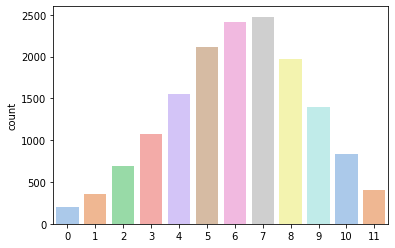

In [14]:
#create FSYESCNT variable that determines the amount of times each person said 'Yes' on the FS#### questions (ITEMS 60)
#Legend:  Number of 'Yes'
import seaborn as sns


FSYESCNT = []      #variable that will be added to csv
yesCount = 0
FSYESCNT_LMH = []

for i in range(15500):
  if df['FSSPORTX'][i] == 1:
    yesCount += 1
  if df['FSVOL'][i] == 1:
    yesCount += 1
  if df['FSMTNG'][i] == 1:
    yesCount += 1
  if df['FSPTMTNG'][i] == 1:
    yesCount += 1
  if df['FSATCNFN'][i] == 1:
    yesCount += 1
  if df['FSFUNDRS'][i] == 1:
    yesCount += 1
  if df['FSCOMMTE'][i] == 1:
    yesCount += 1
  if df['FSCOUNSLR'][i] == 1:
    yesCount += 1
  if df['FSFREQ'][i] > 7.02: #greater than the mean
    yesCount +=1
  if df['FSNOTESX'][i] == 1:
    yesCount += 1
  if df['FSMEMO'][i] == 1:
    yesCount += 1
  FSYESCNT.append(yesCount)
  if yesCount <= 4:
    FSYESCNT_LMH.append('1) LOW INVOLVMENT')
  elif yesCount > 4 and yesCount<=8:
    FSYESCNT_LMH.append('2) MEDIUM INVOLVEMENT')
  elif yesCount > 8:
    FSYESCNT_LMH.append('3) HIGH INVOLVEMENT')
  yesCount = 0

df["FSYESCNT"] = FSYESCNT
df["FSYESCNT_LMH"] = FSYESCNT_LMH

df.to_csv("sample.csv", index=False)  #adds variable to csv

#Question: How many times did you say 'Yes' to FS questions (item 60)
#Legend:  Number of 'Yes'
FSYESCNT = []
for element in df["FSYESCNT"]:
    if element != -1:
      FSYESCNT.append(element)

        
res = sns.countplot(x=FSYESCNT, palette="pastel")



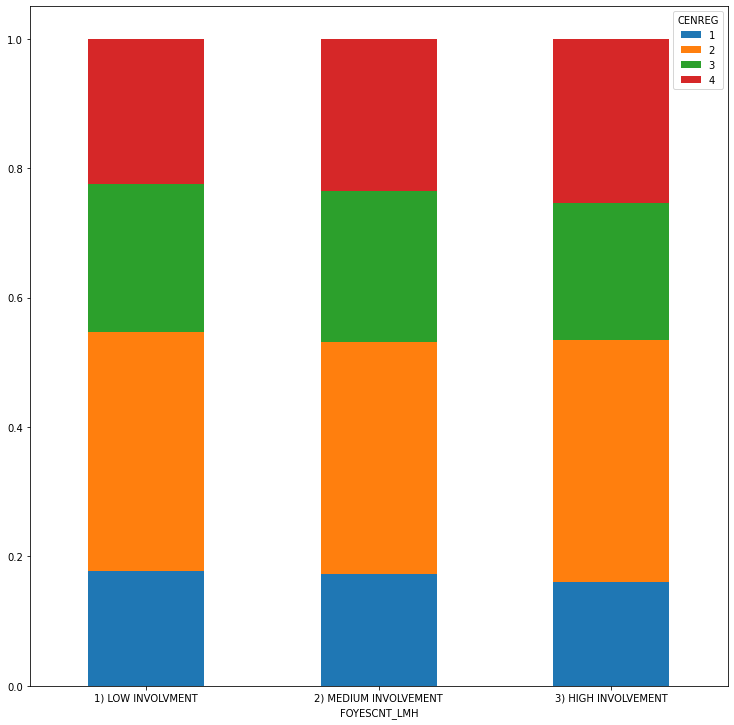

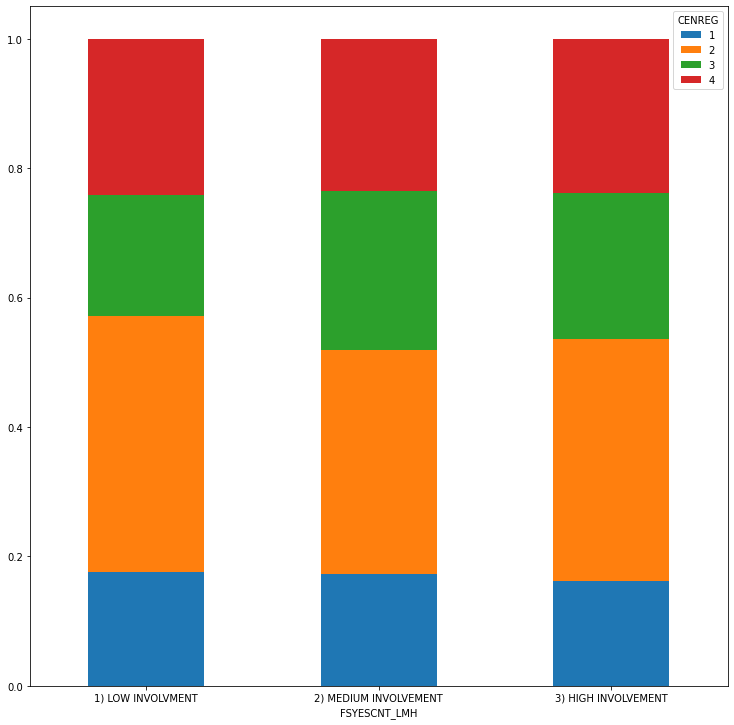

In [18]:
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.CENREG, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


crosstb_LMH = pd.crosstab(df.FSYESCNT_LMH, df.CENREG, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


CENREG                    1     2     3     4
FOYESCNT_LMH                                 
1) LOW INVOLVMENT       504  1044   647   636
2) MEDIUM INVOLVEMENT  1589  3297  2148  2163
3) HIGH INVOLVEMENT     560  1298   733   881
CENREG                        1         2         3         4
FOYESCNT_LMH                                                 
1) LOW INVOLVMENT      0.189974  0.185139  0.183390  0.172826
2) MEDIUM INVOLVEMENT  0.598945  0.584678  0.608844  0.587772
3) HIGH INVOLVEMENT    0.211082  0.230183  0.207766  0.239402


Text(0.5, 1.0, 'High Outside Involvement vs. Region')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


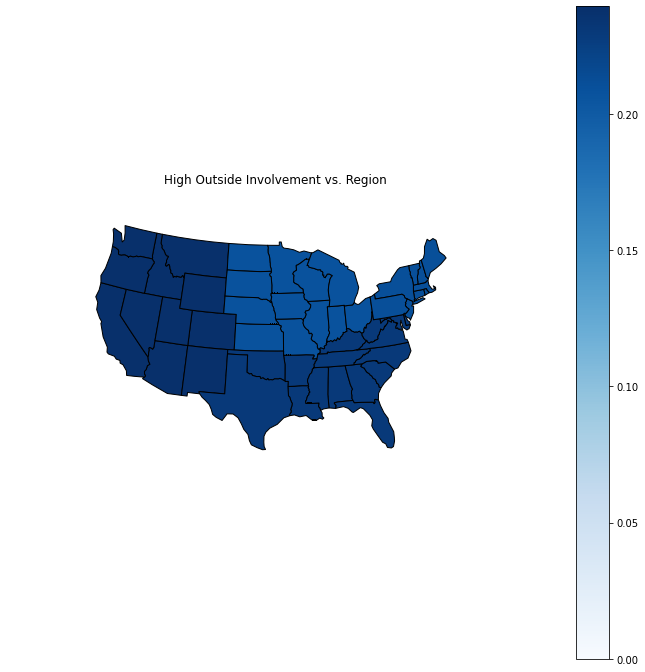

In [19]:
#now let's do regional differences for parental involvement FSSPORTX
# Since the beginning of this school year, has any adult in this child’s household Attended a school or class event,
# such as a play, dance, sports event, or science fair
#1 is yes, 2 is no

contiguous_usa['FOYESCNT_LMH_percent'] = 0

print(pd.crosstab(df.FOYESCNT_LMH, df.CENREG))

ct = pd.crosstab(df.FOYESCNT_LMH, df.CENREG, normalize='columns')
print(ct)

#let's go by percent that respond "yes"

for s in contiguous_usa.index:
  if contiguous_usa.loc[s,'state'] in west: #code 4
    contiguous_usa.loc[s,'FOYESCNT_LMH_percent'] = ct[4][2]
  elif contiguous_usa.loc[s,'state'] in midwest: # code 3
      contiguous_usa.loc[s,'FOYESCNT_LMH_percent'] = ct[3][2]
  elif contiguous_usa.loc[s,'state'] in south: #code 2
      contiguous_usa.loc[s,'FOYESCNT_LMH_percent'] = ct[2][2]
  elif contiguous_usa.loc[s,'state'] in northeast: #code 1
      contiguous_usa.loc[s,'FOYESCNT_LMH_percent'] = ct[1][2]

gplt.choropleth(contiguous_usa, hue='FOYESCNT_LMH_percent', projection=gcrs.AlbersEqualArea(), cmap='Blues', legend=True, edgecolor='Black', figsize=(12, 12))
plt.title("High Outside Involvement vs. Region")


CENREG                    1     2     3     4
FSYESCNT_LMH                                 
1) LOW INVOLVMENT       681  1541   728   936
2) MEDIUM INVOLVEMENT  1547  3112  2204  2118
3) HIGH INVOLVEMENT     425   986   596   626
CENREG                        1         2         3         4
FSYESCNT_LMH                                                 
1) LOW INVOLVMENT      0.256691  0.273275  0.206349  0.254348
2) MEDIUM INVOLVEMENT  0.583113  0.551871  0.624717  0.575543
3) HIGH INVOLVEMENT    0.160196  0.174854  0.168934  0.170109


Text(0.5, 1.0, 'High At-School Involvement vs. Region')

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


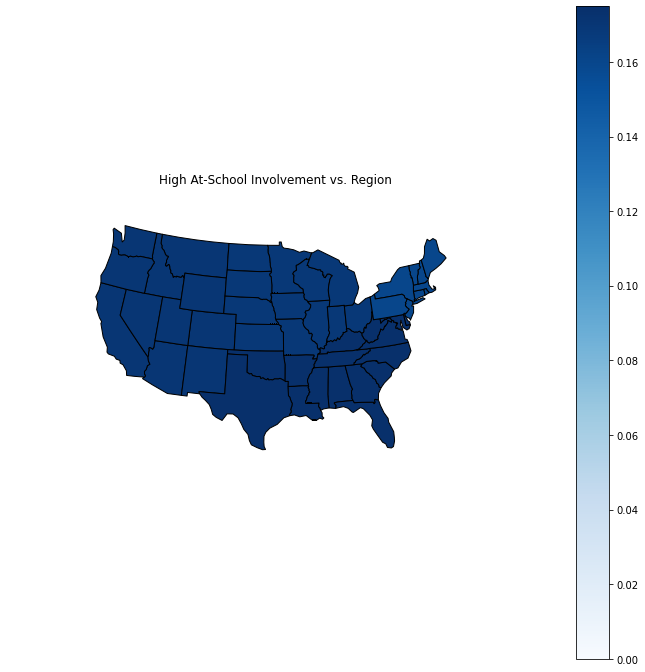

In [20]:
#now let's do regional differences for parental involvement FSYESCNT
# Since the beginning of this school year, has any adult in this child’s household Attended a school or class event,
# such as a play, dance, sports event, or science fair
#1 is yes, 2 is no

contiguous_usa['FSYESCNT_LMH_percent'] = 0

print(pd.crosstab(df.FSYESCNT_LMH, df.CENREG))

ct = pd.crosstab(df.FSYESCNT_LMH, df.CENREG, normalize='columns')
print(ct)

#let's go by percent that respond "yes"

for s in contiguous_usa.index:
  if contiguous_usa.loc[s,'state'] in west: #code 4
    contiguous_usa.loc[s,'FSYESCNT_LMH_percent'] = ct[4][2]
  elif contiguous_usa.loc[s,'state'] in midwest: # code 3
      contiguous_usa.loc[s,'FSYESCNT_LMH_percent'] = ct[3][2]
  elif contiguous_usa.loc[s,'state'] in south: #code 2
      contiguous_usa.loc[s,'FSYESCNT_LMH_percent'] = ct[2][2]
  elif contiguous_usa.loc[s,'state'] in northeast: #code 1
      contiguous_usa.loc[s,'FSYESCNT_LMH_percent'] = ct[1][2]

gplt.choropleth(contiguous_usa, hue='FSYESCNT_LMH_percent', projection=gcrs.AlbersEqualArea(), cmap='Blues', legend=True, edgecolor='Black', figsize=(12, 12))
plt.title("High At-School Involvement vs. Region")


In [ ]:
#now let's do regional differences for parental involvement FSYESCNT
# Since the beginning of this school year, has any adult in this child’s household Attended a school or class event,
# such as a play, dance, sports event, or science fair
#1 is yes, 2 is no

contiguous_usa['FSYESCNT_LMH_percent'] = 0

print(pd.crosstab(df.FSYESCNT_LMH, df.CENREG))

ct = pd.crosstab(df.FSYESCNT_LMH, df.CENREG, normalize='columns')
print(ct)

#let's go by percent that respond "yes"

for s in contiguous_usa.index:
  if contiguous_usa.loc[s,'state'] in west: #code 4
    contiguous_usa.loc[s,'FSYESCNT_LMH_percent'] = ct[4][2]
  elif contiguous_usa.loc[s,'state'] in midwest: # code 3
      contiguous_usa.loc[s,'FSYESCNT_LMH_percent'] = ct[3][2]
  elif contiguous_usa.loc[s,'state'] in south: #code 2
      contiguous_usa.loc[s,'FSYESCNT_LMH_percent'] = ct[2][2]
  elif contiguous_usa.loc[s,'state'] in northeast: #code 1
      contiguous_usa.loc[s,'FSYESCNT_LMH_percent'] = ct[1][2]

gplt.choropleth(contiguous_usa, hue='FSYESCNT_LMH_percent', projection=gcrs.AlbersEqualArea(), cmap='Blues', legend=True, edgecolor='Black', figsize=(12, 12))
plt.title("High At-School Involvement vs. Region")
